In [1]:
#importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
#loading csv file
data=pd.read_csv(r"C:\Users\Siddhant Sonawane\Downloads\Fraud_check.csv")
data

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
#to check null values
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
#describe data
data.describe()

Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000

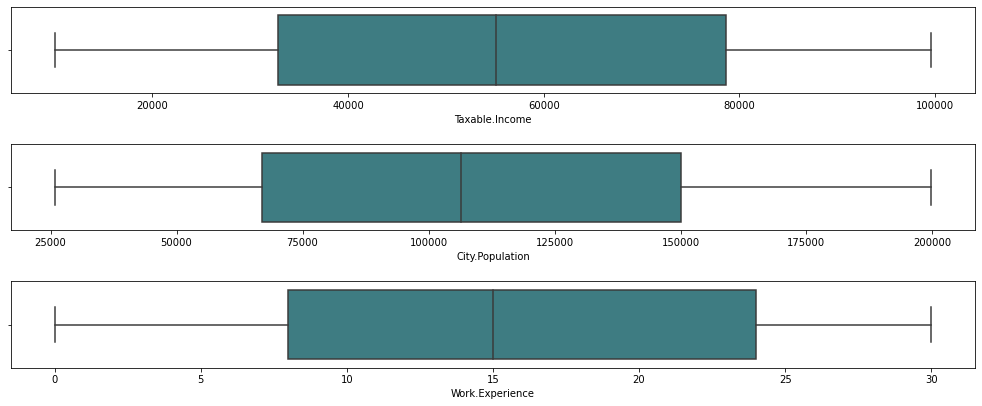

In [7]:
#Outlier detection
ot=data.copy() 
fig, axes=plt.subplots(3,1,figsize=(14,6),sharex=False,sharey=False)
sns.boxplot(x='Taxable.Income',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='City.Population',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Work.Experience',data=ot,palette='crest',ax=axes[2])
plt.tight_layout(pad=2.0)

In [8]:
# treating taxable_income <= 30000 as "Risky" and others are "Good"
df = data.copy()
df['taxable_category'] = pd.cut(x = df['Taxable.Income'], bins = [10002,30000,99620], labels = ['Risky','Good'])
df.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban taxable_category  
0   YES             Good  
1   YES             Good  
2   YES             Good  
3   YES             Good  
4    NO             Good

In [9]:
# categorical features
categorical_features = data.describe(include=['object']).columns
categorical_features

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')

In [10]:
# numerical features
numerical_features = data.describe(include=['int64']).columns
numerical_features

Index(['Taxable.Income', 'City.Population', 'Work.Experience'], dtype='object')

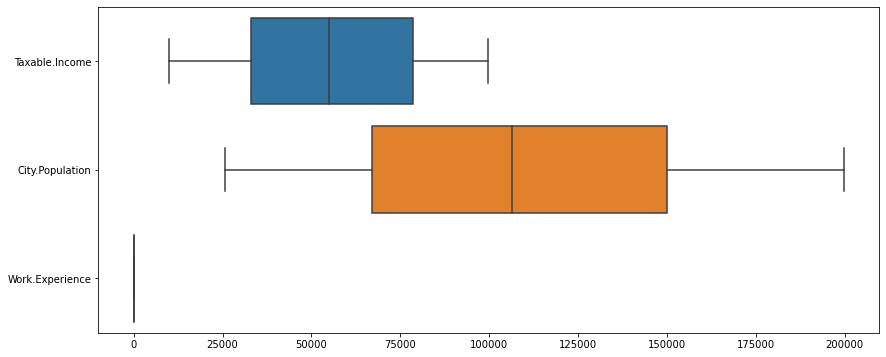

In [11]:
# check outliers in numerical columns
plt.figure(figsize=(14,6))
sns.boxplot(data=df[numerical_features], orient="h");

C:\Users\Siddhant Sonawane\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Taxable Income')

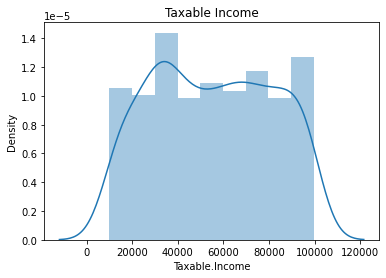

In [12]:
# visualizing features
sns.distplot(data['Taxable.Income']);
plt.title('Taxable Income')

C:\Users\Siddhant Sonawane\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'City Population')

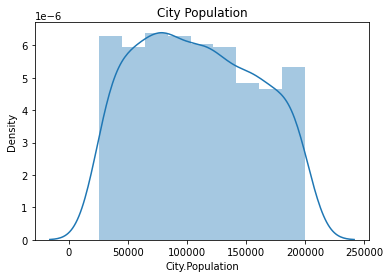

In [13]:
sns.distplot(data['City.Population'])
plt.title('City Population')

C:\Users\Siddhant Sonawane\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Work Experience')

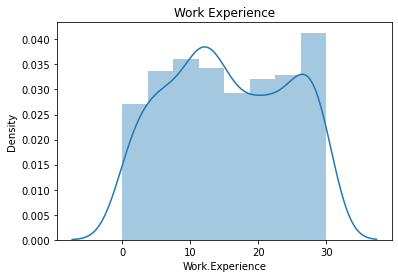

In [14]:
sns.distplot(data['Work.Experience'])
plt.title('Work Experience')

C:\Users\Siddhant Sonawane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Graduated')

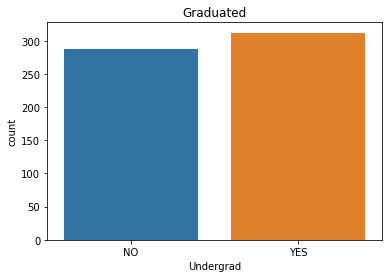

In [15]:
# count plot for categorical features
sns.countplot(data['Undergrad'])
plt.title('Graduated')

C:\Users\Siddhant Sonawane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Marital Status')

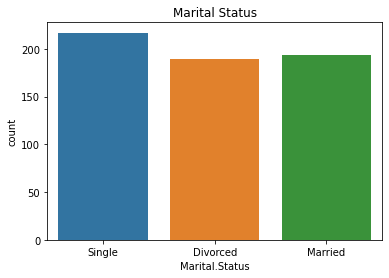

In [16]:
sns.countplot(data['Marital.Status'])
plt.title('Marital Status')

C:\Users\Siddhant Sonawane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Urban')

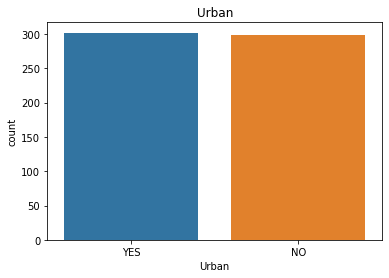

In [17]:
sns.countplot(data['Urban'])
plt.title('Urban')

C:\Users\Siddhant Sonawane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Taxable Category')

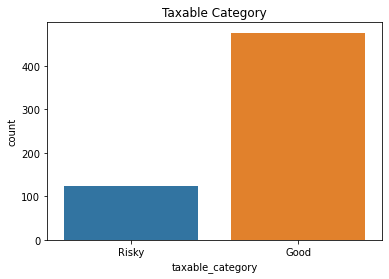

In [18]:
sns.countplot(df['taxable_category'])
plt.title('Taxable Category')

The above plot implies that the target feature has uneven distribution of classes called Imbalance data.

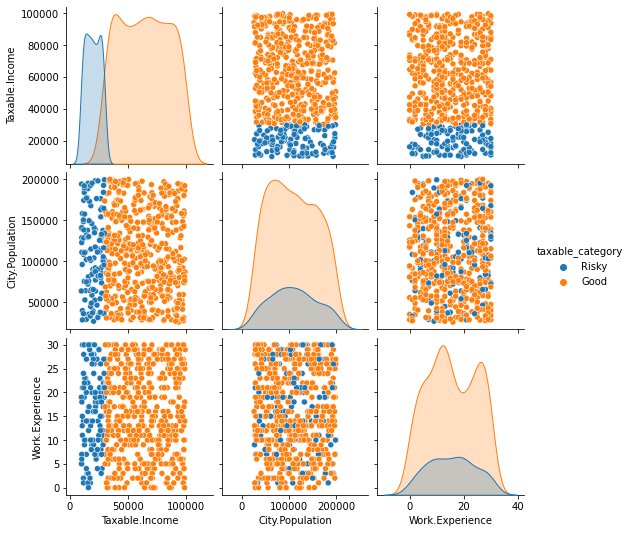

In [19]:
# visualizing all data at once
sns.pairplot(df,hue='taxable_category')

In [20]:
# data preprocessing
df1= df.copy()
df2=df1.rename({'Marital.Status':'marital_status', 'Taxable.Income':'taxable_income','Work.Experience':'work_experience','City.Population':'city_population'},axis=1)
df2.head()

Undergrad marital_status  taxable_income  city_population  work_experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban taxable_category  
0   YES             Good  
1   YES             Good  
2   YES             Good  
3   YES             Good  
4    NO             Good

In [21]:
#dropping taxable_income column
df2.drop('taxable_income',axis=1,inplace=True)

In [22]:
df2.head()

Undergrad marital_status  city_population  work_experience Urban  \
0        NO         Single            50047               10   YES   
1       YES       Divorced           134075               18   YES   
2        NO        Married           160205               30   YES   
3       YES         Single           193264               15   YES   
4        NO        Married            27533               28    NO   

  taxable_category  
0             Good  
1             Good  
2             Good  
3             Good  
4             Good

In [23]:
categorical_features =  df2.describe(include=["object",'category']).columns
categorical_features

Index(['Undergrad', 'marital_status', 'Urban', 'taxable_category'], dtype='object')

In [24]:
#creating dummy variable for categorical variable
le = preprocessing.LabelEncoder()
for col in categorical_features:
    le.fit(df2[col])
    df2[col]=le.transform(df2[col])
    
df2.head()    

Undergrad  marital_status  city_population  work_experience  Urban  \
0          0               2            50047               10      1   
1          1               0           134075               18      1   
2          0               1           160205               30      1   
3          1               2           193264               15      1   
4          0               1            27533               28      0   

   taxable_category  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Undergrad         600 non-null    int32
 1   marital_status    600 non-null    int32
 2   city_population   600 non-null    int64
 3   work_experience   600 non-null    int64
 4   Urban             600 non-null    int32
 5   taxable_category  600 non-null    int32
dtypes: int32(4), int64(2)
memory usage: 18.9 KB


In [26]:
df2[['Undergrad','marital_status','Urban','taxable_category']]=df2[['Undergrad','marital_status','Urban','taxable_category']].astype('category')

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Undergrad         600 non-null    category
 1   marital_status    600 non-null    category
 2   city_population   600 non-null    int64   
 3   work_experience   600 non-null    int64   
 4   Urban             600 non-null    category
 5   taxable_category  600 non-null    category
dtypes: category(4), int64(2)
memory usage: 12.3 KB


In [28]:
# getting unique values of taxable_category
df2['taxable_category'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [29]:
# countig vlaues of taxable category
df2.taxable_category.value_counts()

0    476
1    124
Name: taxable_category, dtype: int64

In [30]:
#splitting data
X = df2.iloc[:,:5]
X.head()

Undergrad marital_status  city_population  work_experience Urban
0         0              2            50047               10     1
1         1              0           134075               18     1
2         0              1           160205               30     1
3         1              2           193264               15     1
4         0              1            27533               28     0

In [31]:
Y = df2['taxable_category']
Y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: taxable_category, Length: 600, dtype: category
Categories (2, int64): [0, 1]

In [32]:
Y.value_counts()

0    476
1    124
Name: taxable_category, dtype: int64

Our target variable is distributed unevenly, hence it is an imbalance data.

installing imblearn to resolve the problem of imbalance data

In [33]:
!pip install imblearn

### Using Random over sampling 

In [34]:
# import RadomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler

In [35]:
os = RandomOverSampler(sampling_strategy='minority')

In [36]:
X_train_res, Y_train_res = os.fit_resample(X,Y)

In [37]:
X_train_res.shape, Y_train_res.shape

((952, 5), (952,))

In [38]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Original dataset shape {}'.format(Counter(Y_train_res)))

Original dataset shape Counter({0: 476, 1: 124})
Original dataset shape Counter({0: 476, 1: 476})


In [39]:
#spliting data into training and testing data set
x_train,x_test,y_train,y_test = train_test_split(X_train_res,Y_train_res,test_size=0.30,random_state=10)

 ## Building Decision Tree Classifier using Entropy Criteria

In [40]:
#import necessary library
from sklearn.tree import DecisionTreeClassifier

#creating an object
model_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=4)

#fitting model
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

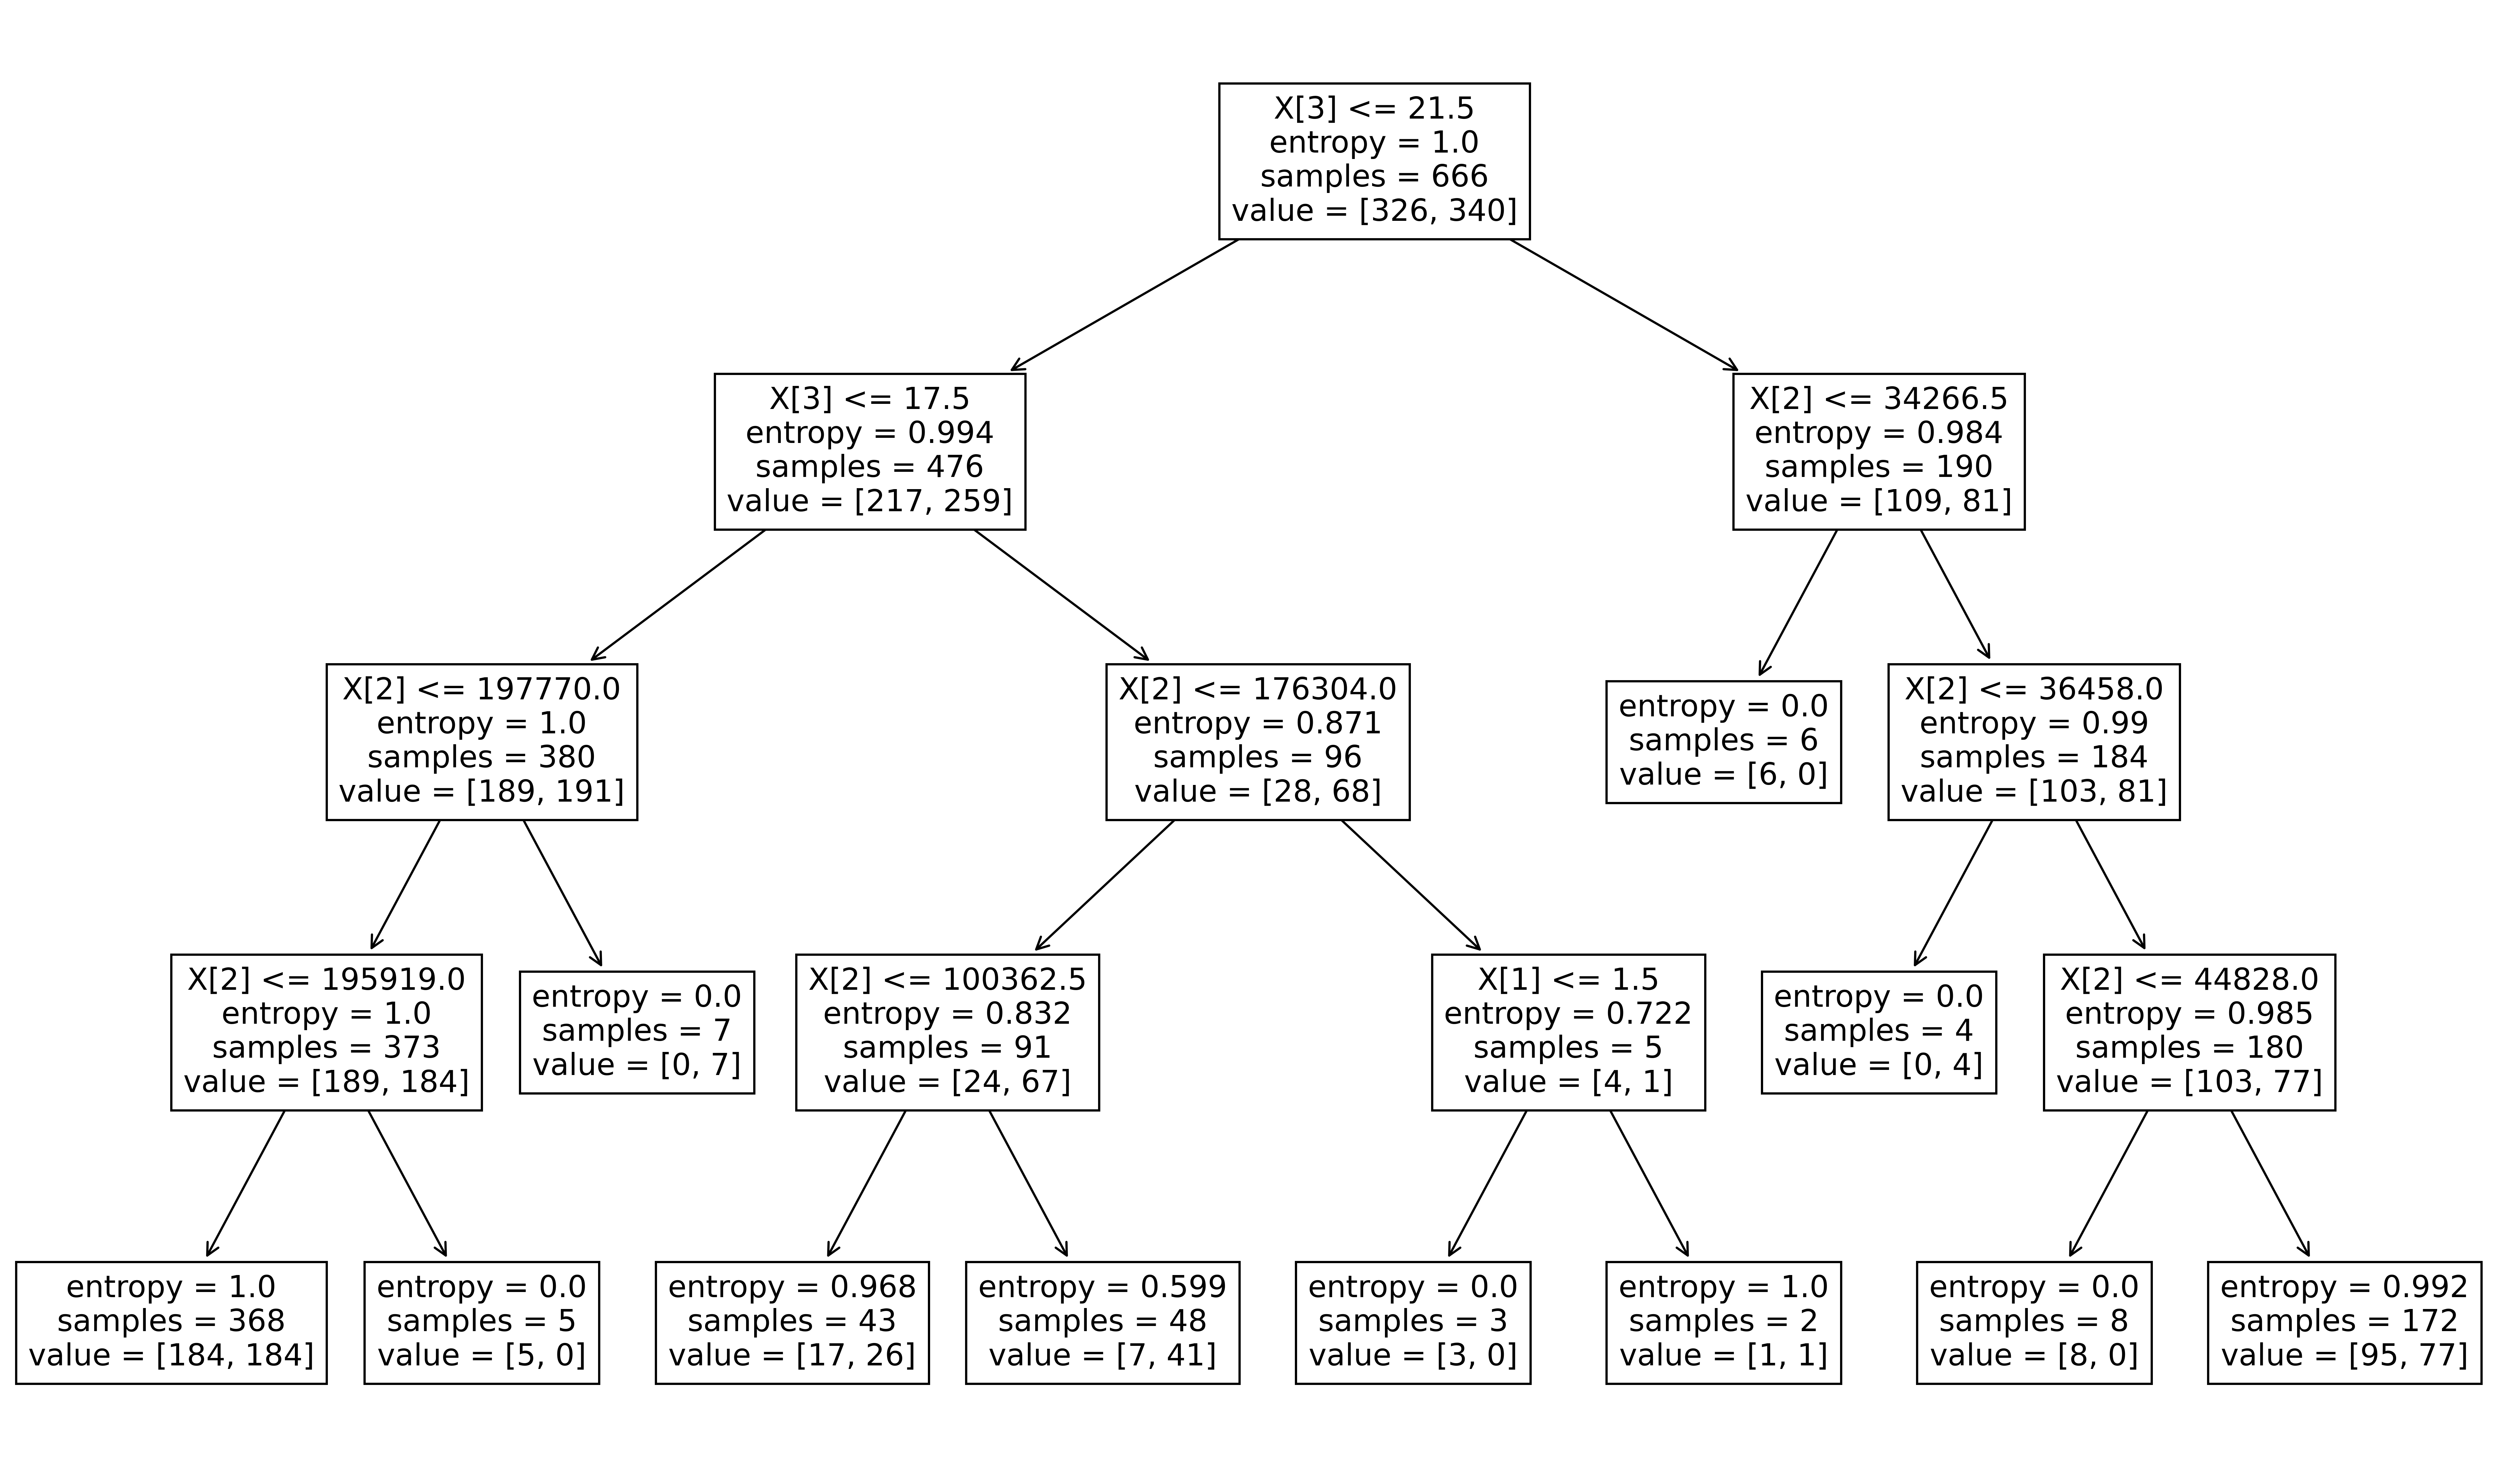

In [41]:
from sklearn import tree

#plotting decision tree
fig = plt.figure(figsize=(20,12),dpi=(500))
tree.plot_tree(model_entropy);

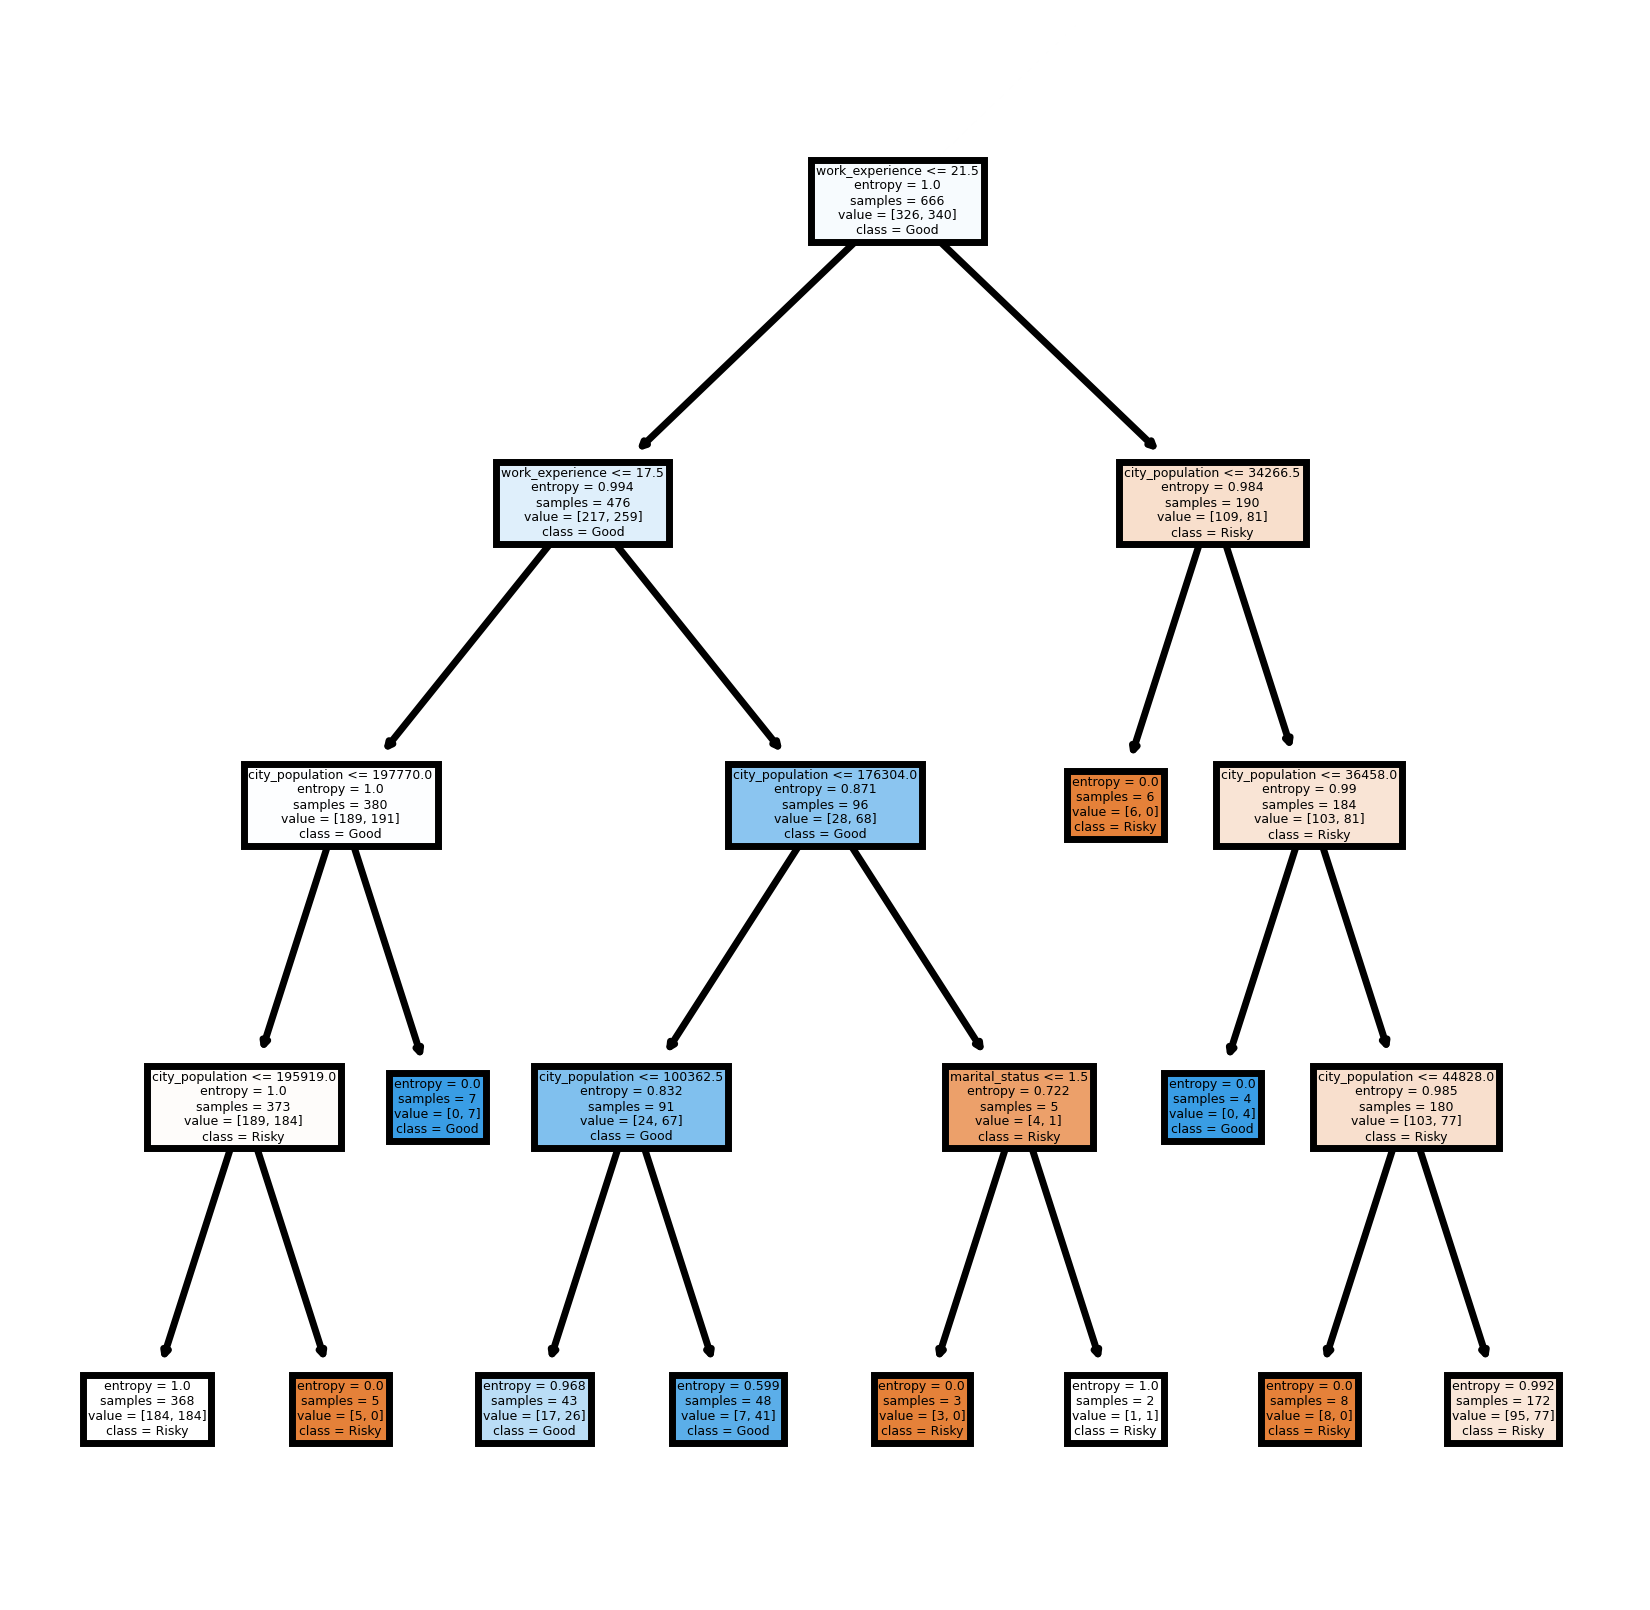

In [42]:
fn=['Undergrad','marital_status','city_population','work_experience','Urban']
cn=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(model_entropy,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [43]:
# predicting on test data
preds = model_entropy.predict(x_test)
pd.Series(preds).value_counts()

0    243
1     43
dtype: int64

In [44]:
preds

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [45]:
pd.crosstab(y_test,preds)

col_0               0   1
taxable_category         
0                 133  17
1                 110  26

In [46]:
#Accuracy
np.mean(preds==y_test)

0.5559440559440559

In [47]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.55      0.89      0.68       150
           1       0.60      0.19      0.29       136

    accuracy                           0.56       286
   macro avg       0.58      0.54      0.48       286
weighted avg       0.57      0.56      0.49       286



In [48]:
#confusion matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,preds)
cm

array([[133,  17],
       [110,  26]], dtype=int64)

# Building Decision Tree Classifier (CART) using Gini Criteria

In [49]:
#model
model_gini = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=20)

#fitting an object
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=20)

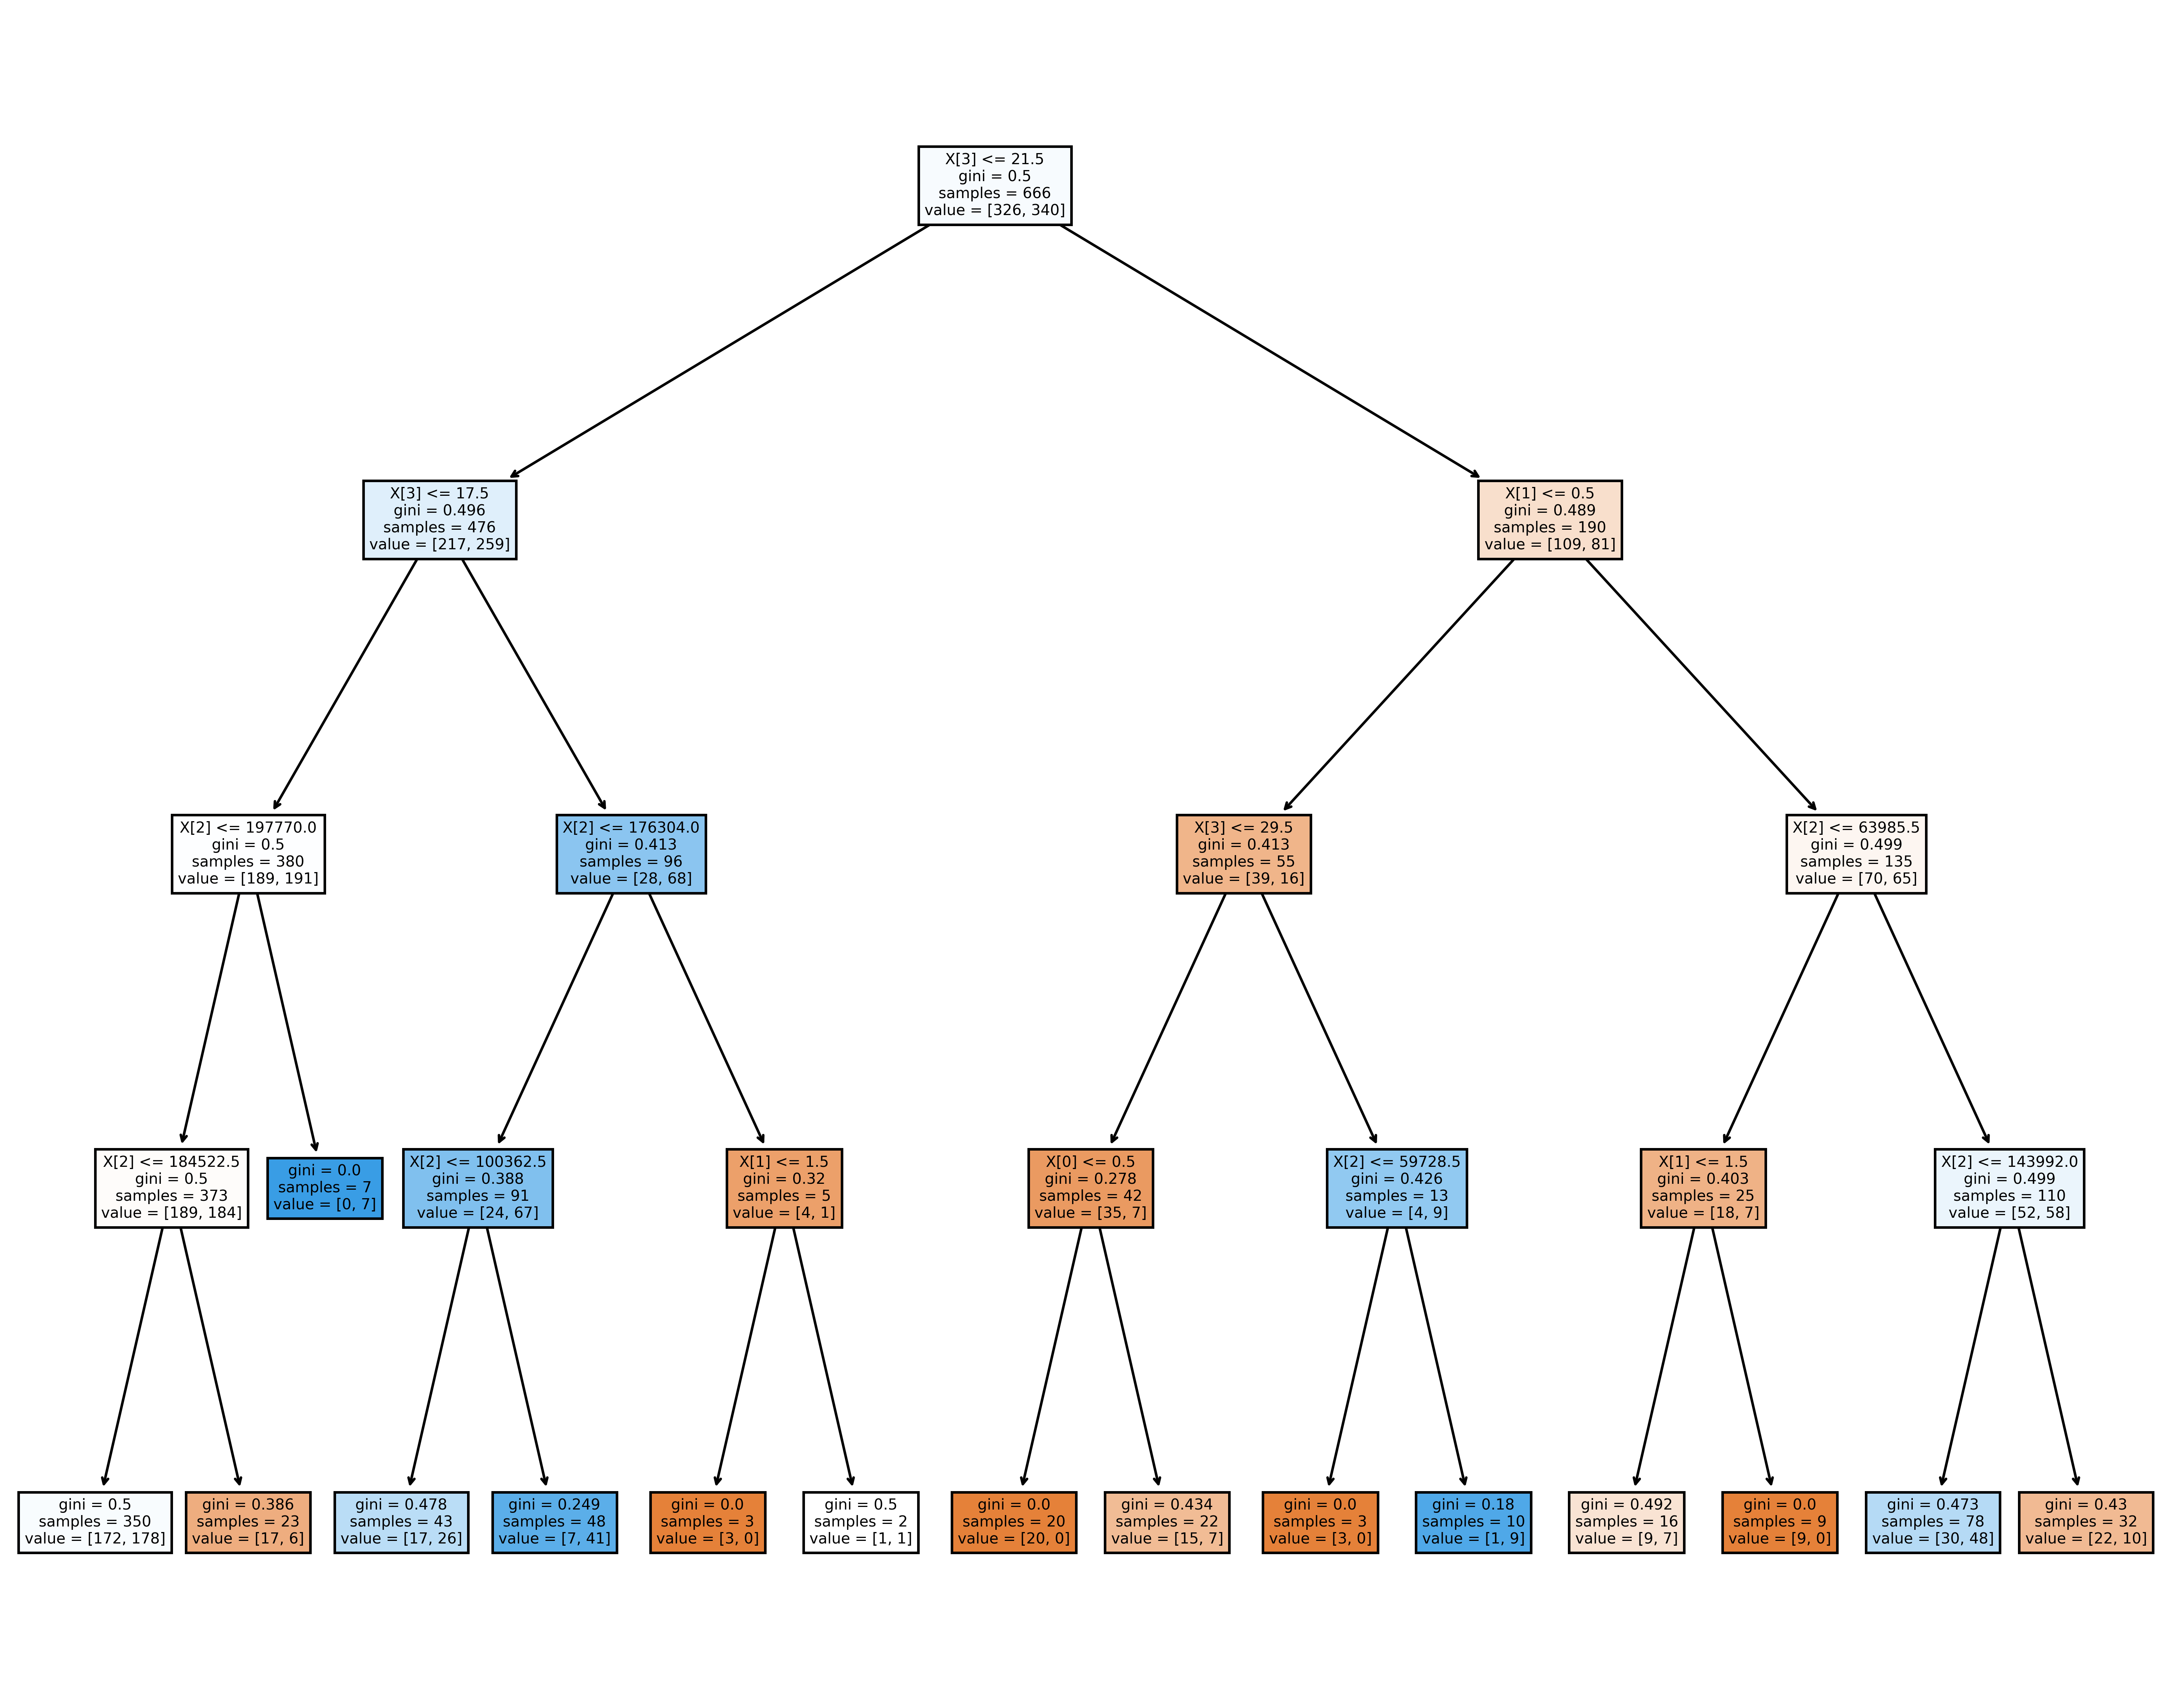

In [50]:
#plotting tree
fig = plt.figure(figsize=(15,12),dpi=(500))
tree.plot_tree(model_gini,filled=True);

In [51]:
#predicting on test data
preds_g=model_gini.predict(x_test)

In [52]:
pd.Series(preds_g).value_counts()

1    236
0     50
dtype: int64

In [53]:
#Accuracy
np.mean(preds_g==y_test)

0.5244755244755245

In [54]:
#Classification report
print(classification_report(y_test,preds_g))

              precision    recall  f1-score   support

           0       0.64      0.21      0.32       150
           1       0.50      0.87      0.63       136

    accuracy                           0.52       286
   macro avg       0.57      0.54      0.48       286
weighted avg       0.57      0.52      0.47       286



In [55]:
#confusion matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,preds_g)
cm

array([[ 32, 118],
       [ 18, 118]], dtype=int64)

In [56]:
pd.crosstab(y_test,preds_g)

col_0              0    1
taxable_category         
0                 32  118
1                 18  118

CART is predicting 'Risky' better than C5 But it is not good at predicting 'Good'.

### Using stratify sampling

In [94]:
#splitting data using stratify sampling
x_train_strat,x_test_strat,y_train_strat,y_test_strat = train_test_split(X,Y,test_size=0.33,random_state=33,stratify=Y,shuffle=True)

### Building Decision Tree Classifier using Entropy Criteria

In [95]:
#creating model
model_en1 = DecisionTreeClassifier(criterion='entropy',max_depth=4) 

#fitting model
model_en1.fit(x_train_strat,y_train_strat)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

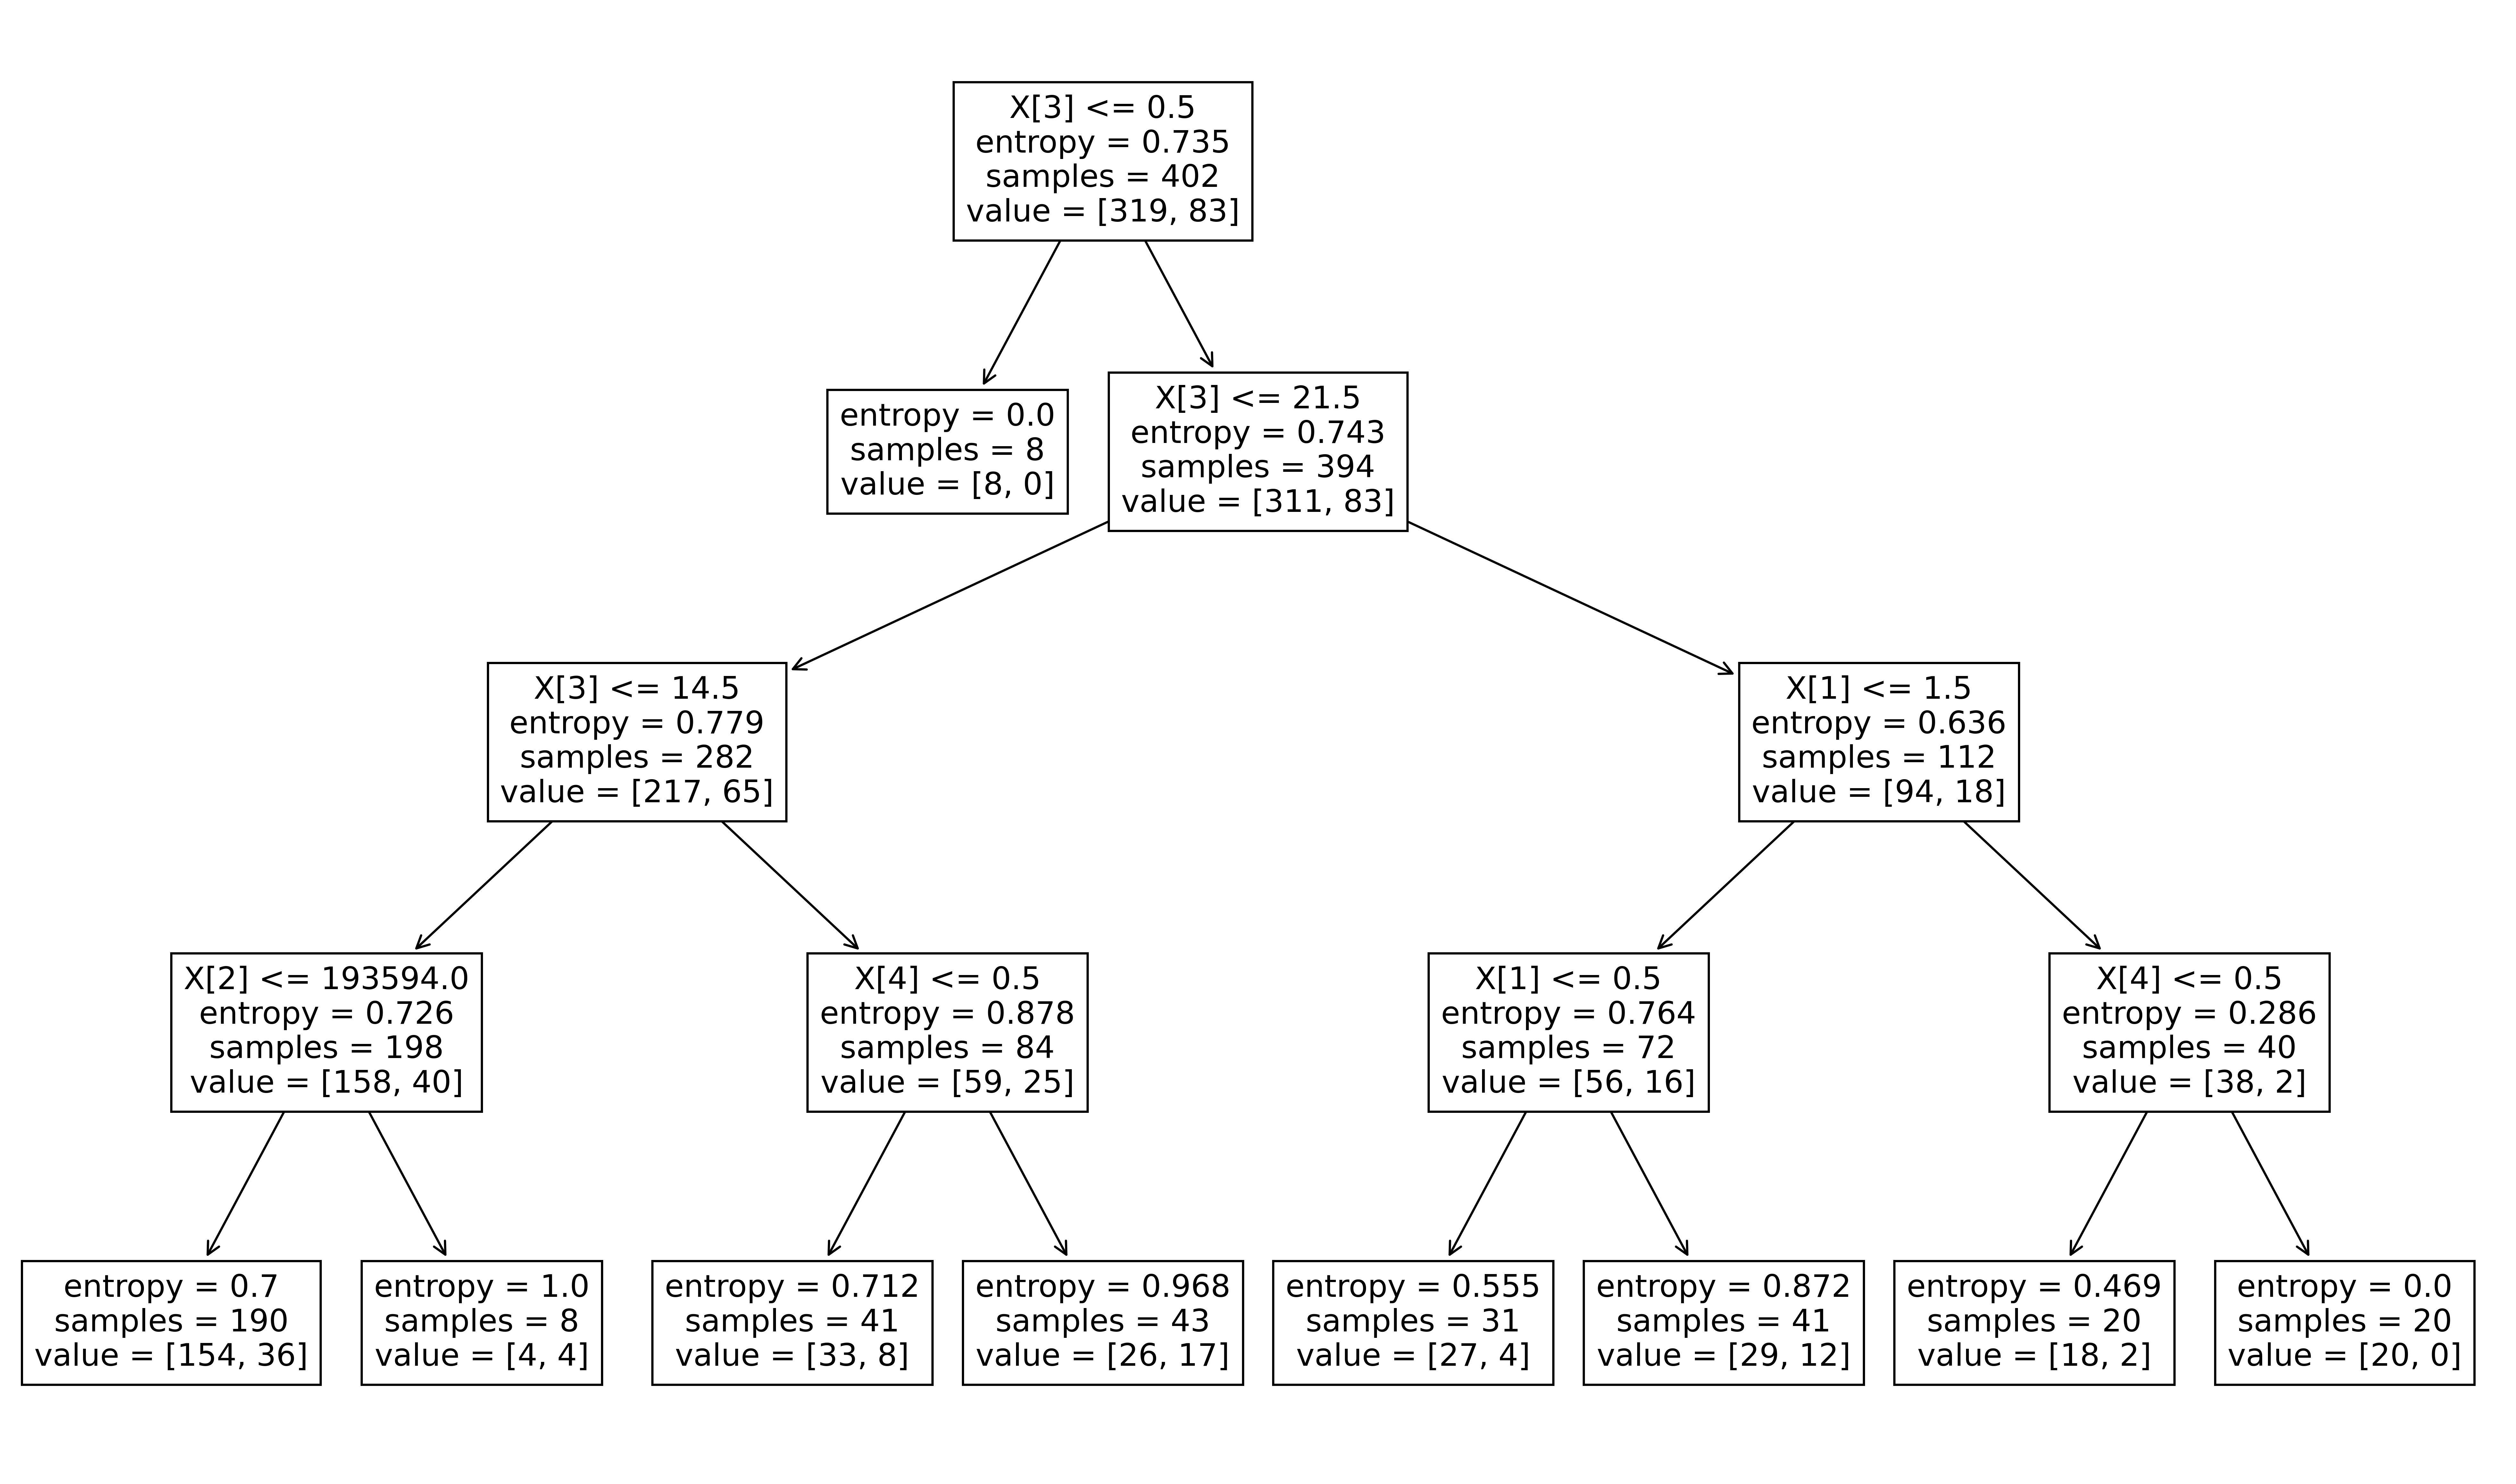

In [96]:
#plotting decision tree
fig = plt.figure(figsize=(20,12),dpi=(500))
tree.plot_tree(model_en1);

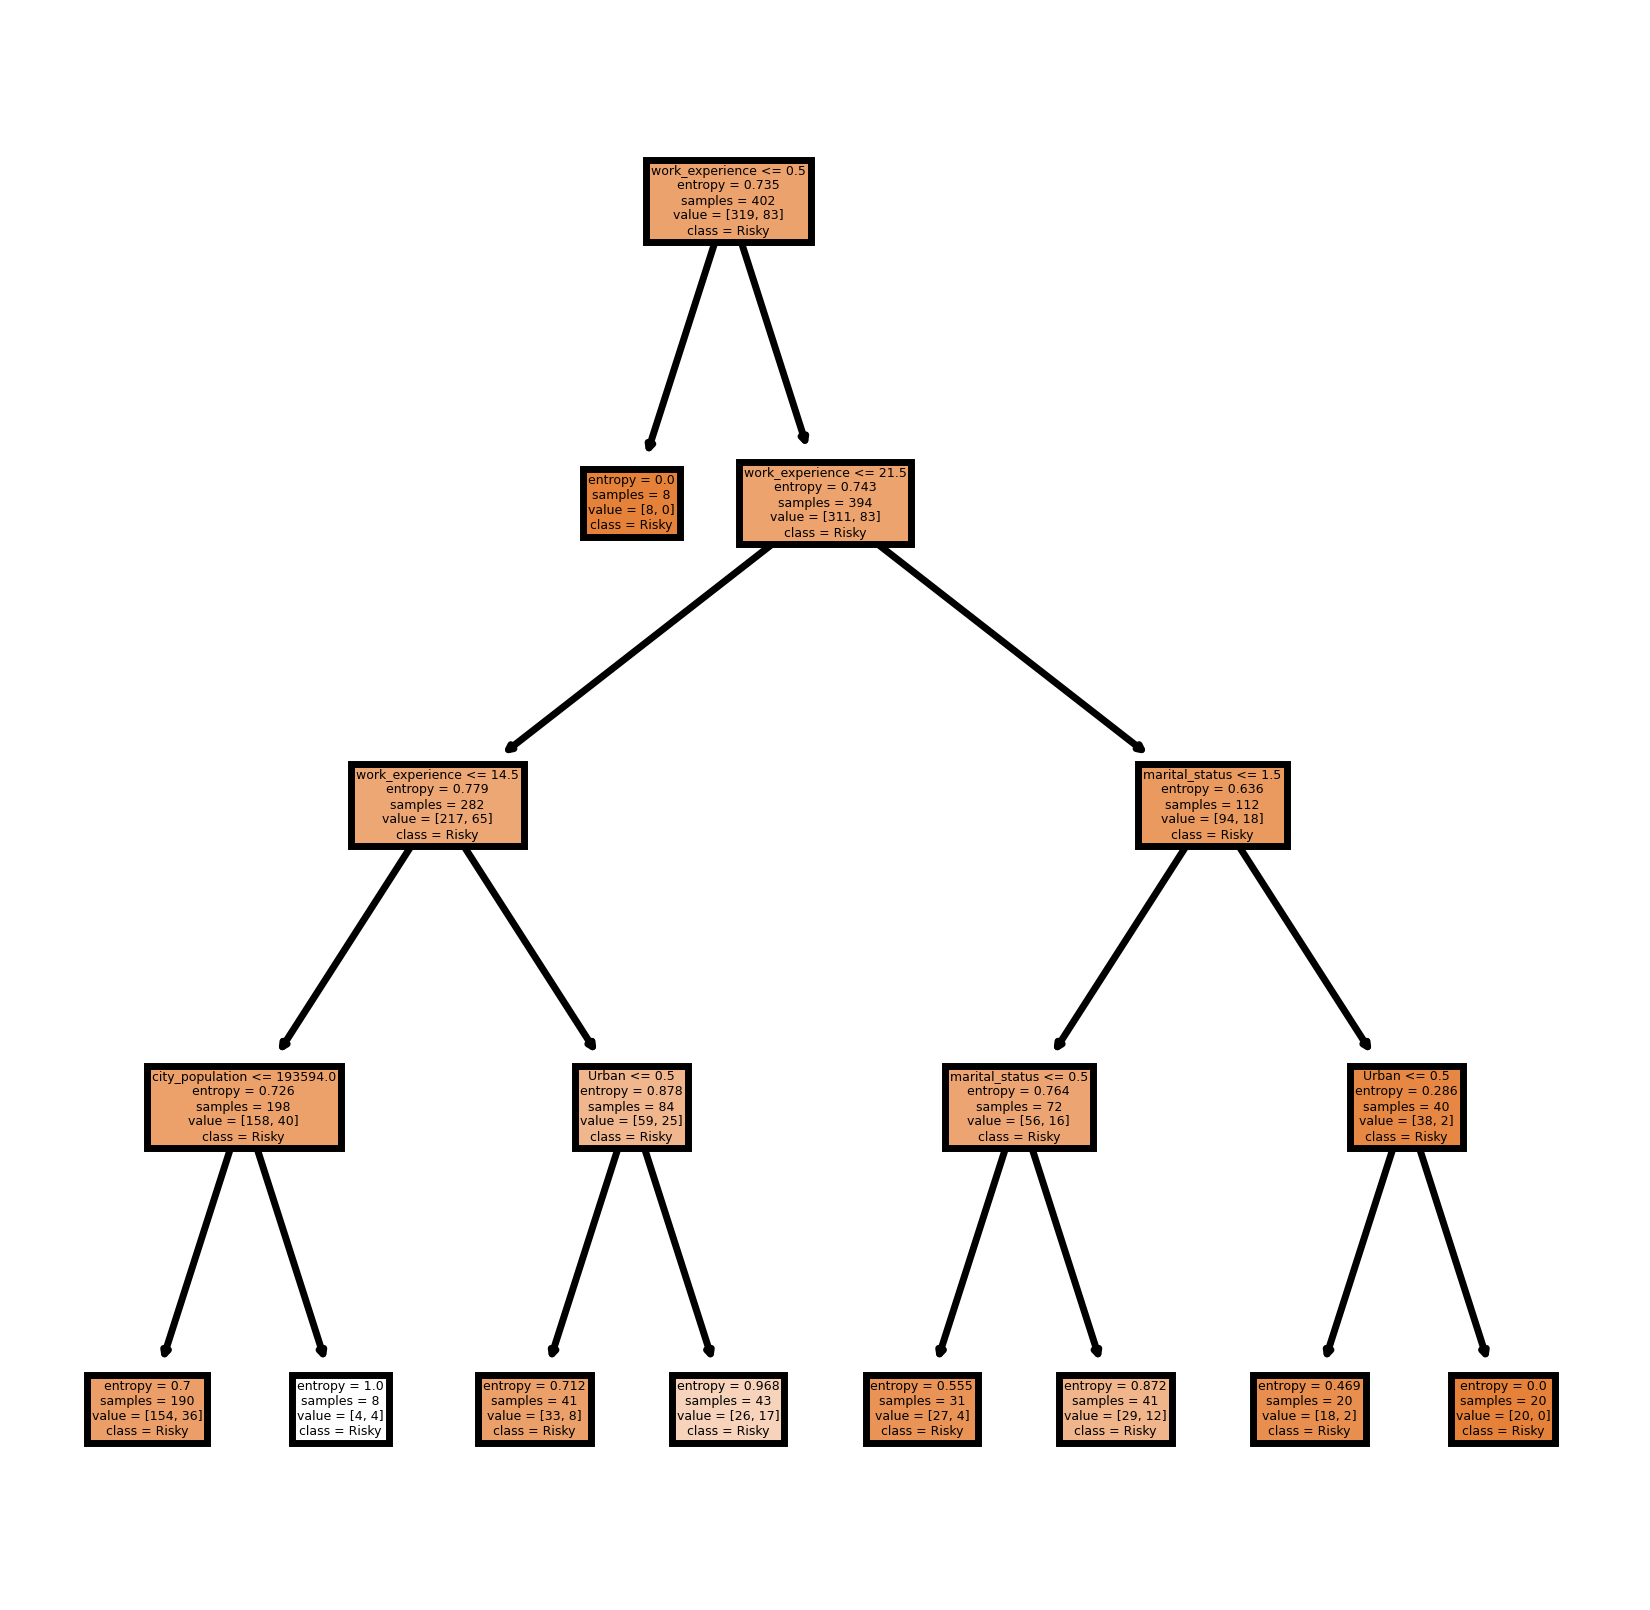

In [97]:
fn=['Undergrad','marital_status','city_population','work_experience','Urban']
cn=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(model_en1,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [98]:
#predicting on test data
pred_strat=model_en1.predict(x_test_strat)

In [99]:
pd.Series(pred_strat).value_counts()

0    198
dtype: int64

In [100]:
#Accuracy
print((y_test_strat==pred_strat).value_counts())

True     157
False     41
Name: taxable_category, dtype: int64


In [101]:
np.mean(pred_strat==y_test_strat)

0.7929292929292929

In [114]:
pd.crosstab(y_test_strat,pred_strat)

col_0               0
taxable_category     
0                 157
1                  41

In [103]:
confusion_matrix(y_test_strat,pred_strat)

array([[157,   0],
       [ 41,   0]], dtype=int64)

### Using gini criterion

In [104]:
#creating model
model_gi1 = DecisionTreeClassifier(criterion='gini',max_depth = 4, random_state=22)

#fitting in train data
model_gi1.fit(x_train_strat,y_train_strat)

DecisionTreeClassifier(max_depth=4, random_state=22)

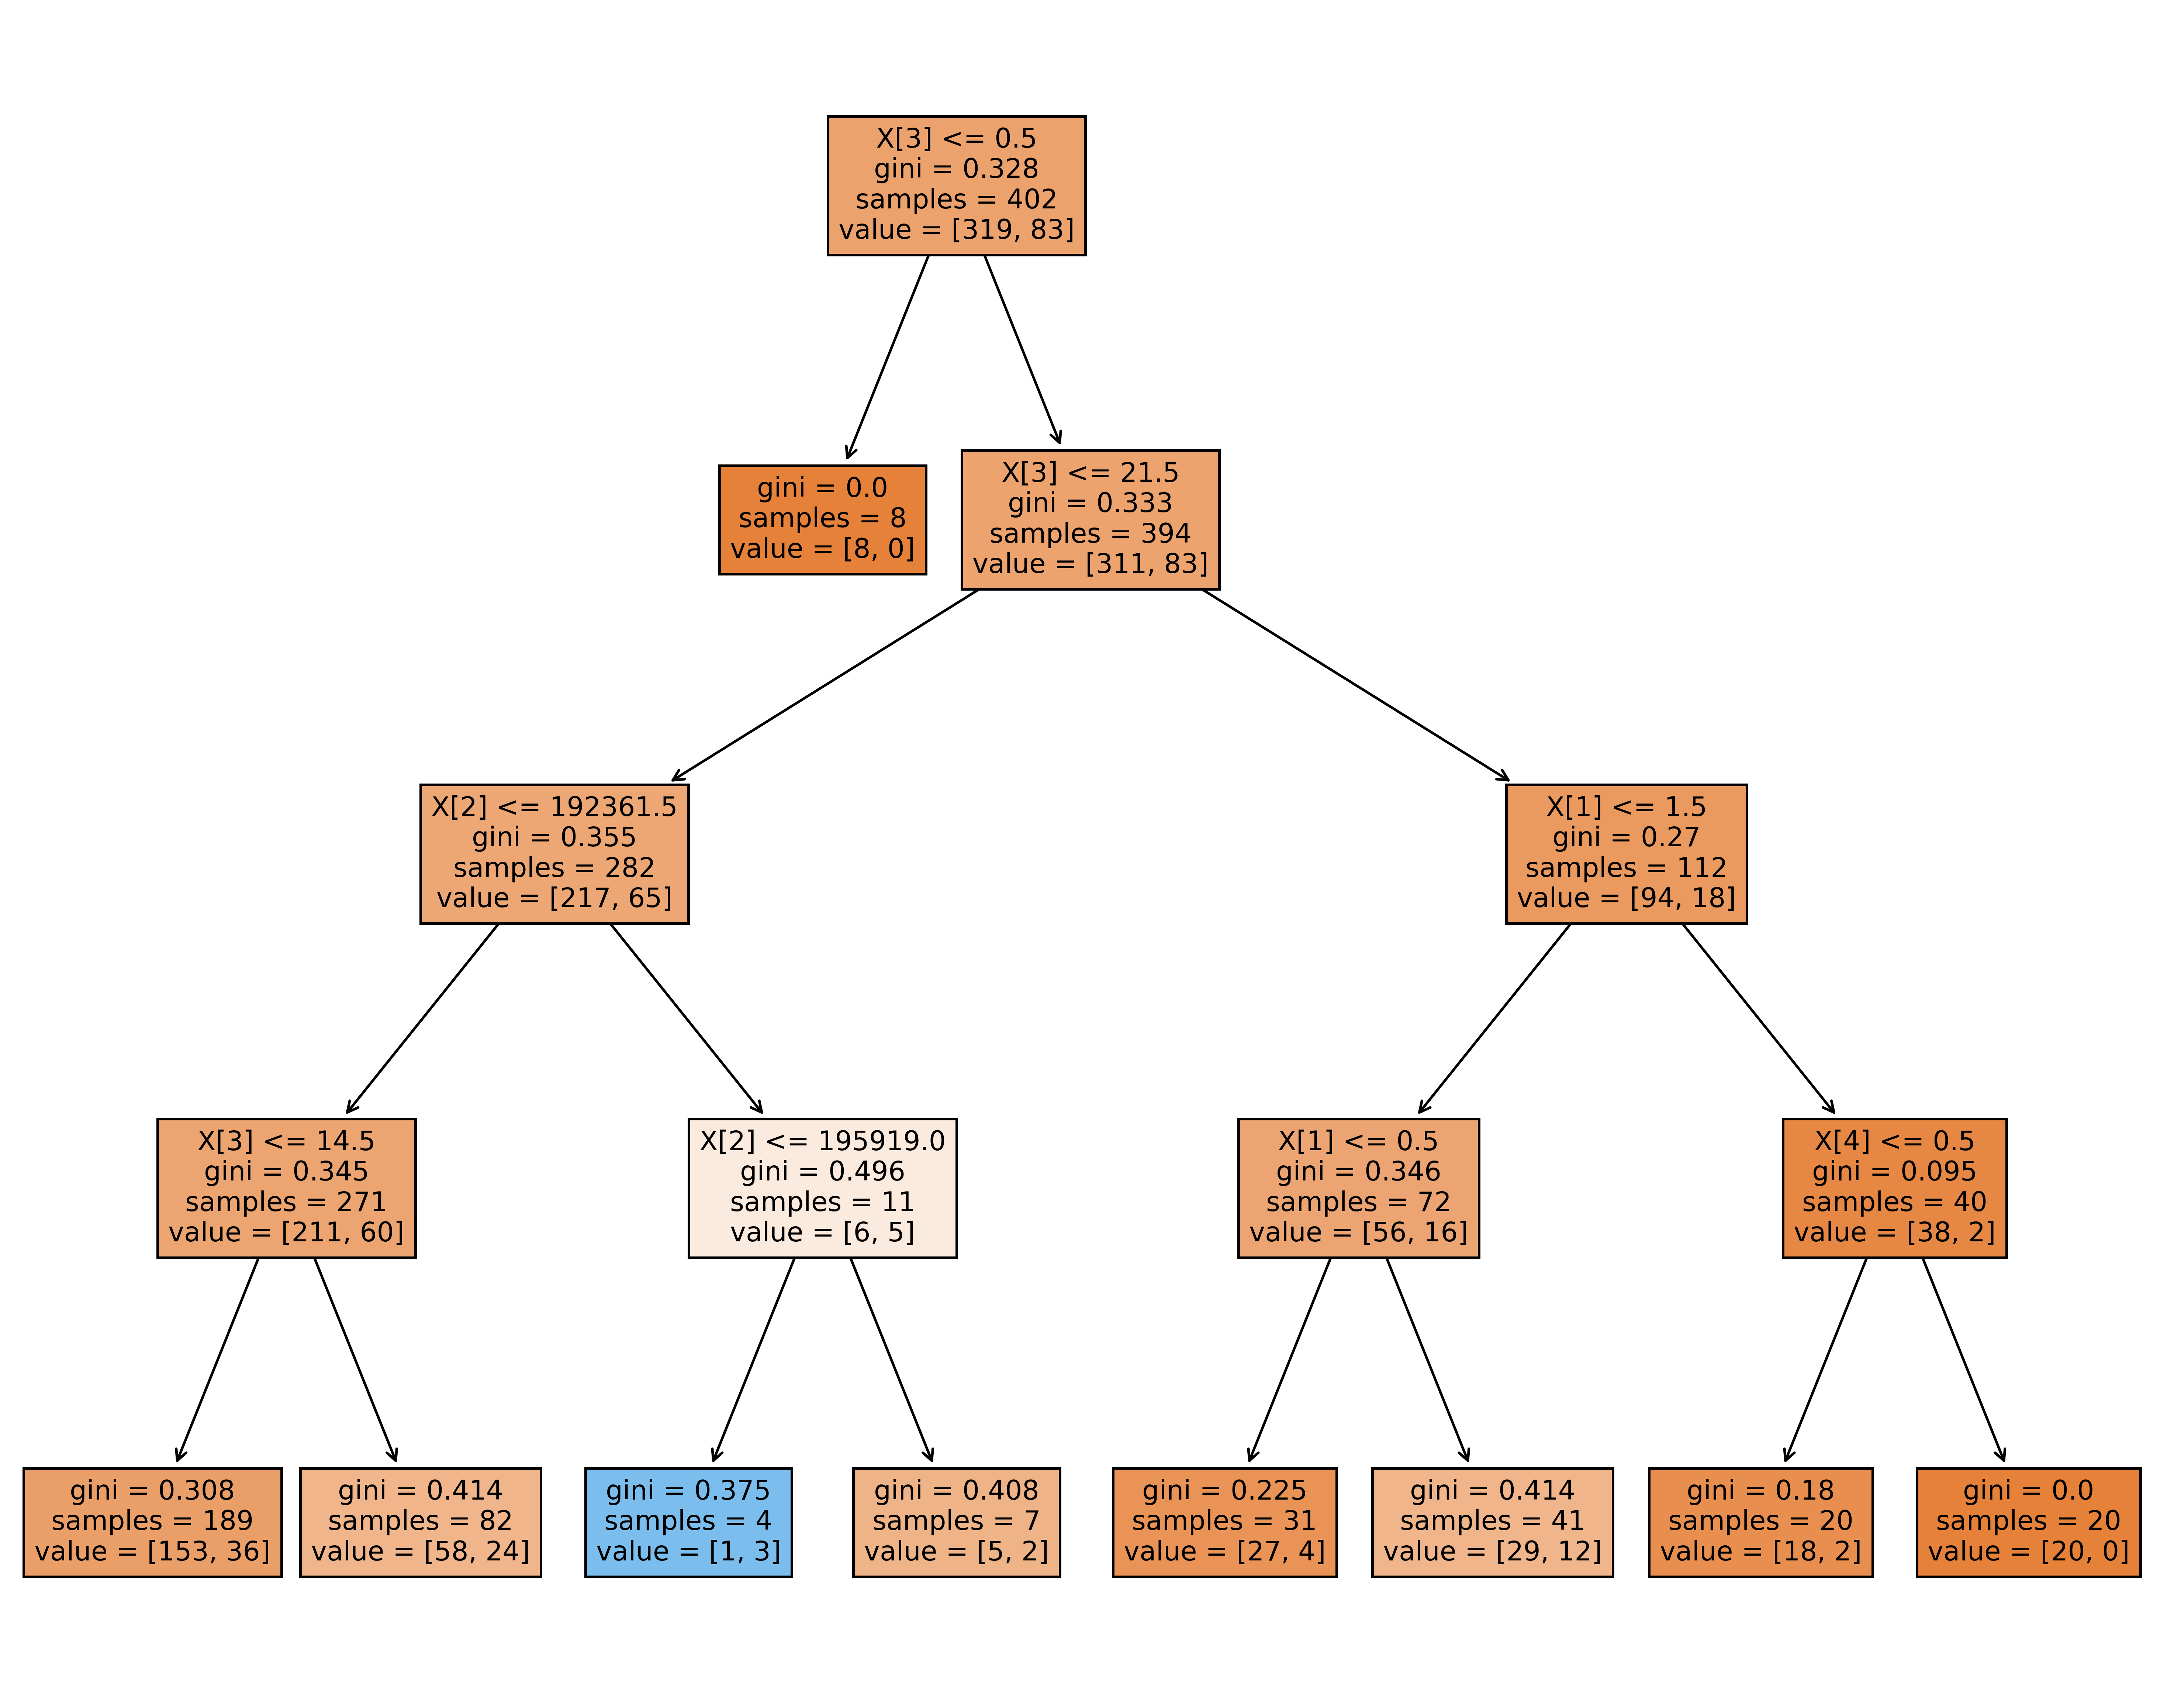

In [105]:
#creating decision tree
#plotting tree
fig = plt.figure(figsize=(15,12),dpi=(500))
tree.plot_tree(model_gi1,filled=True);

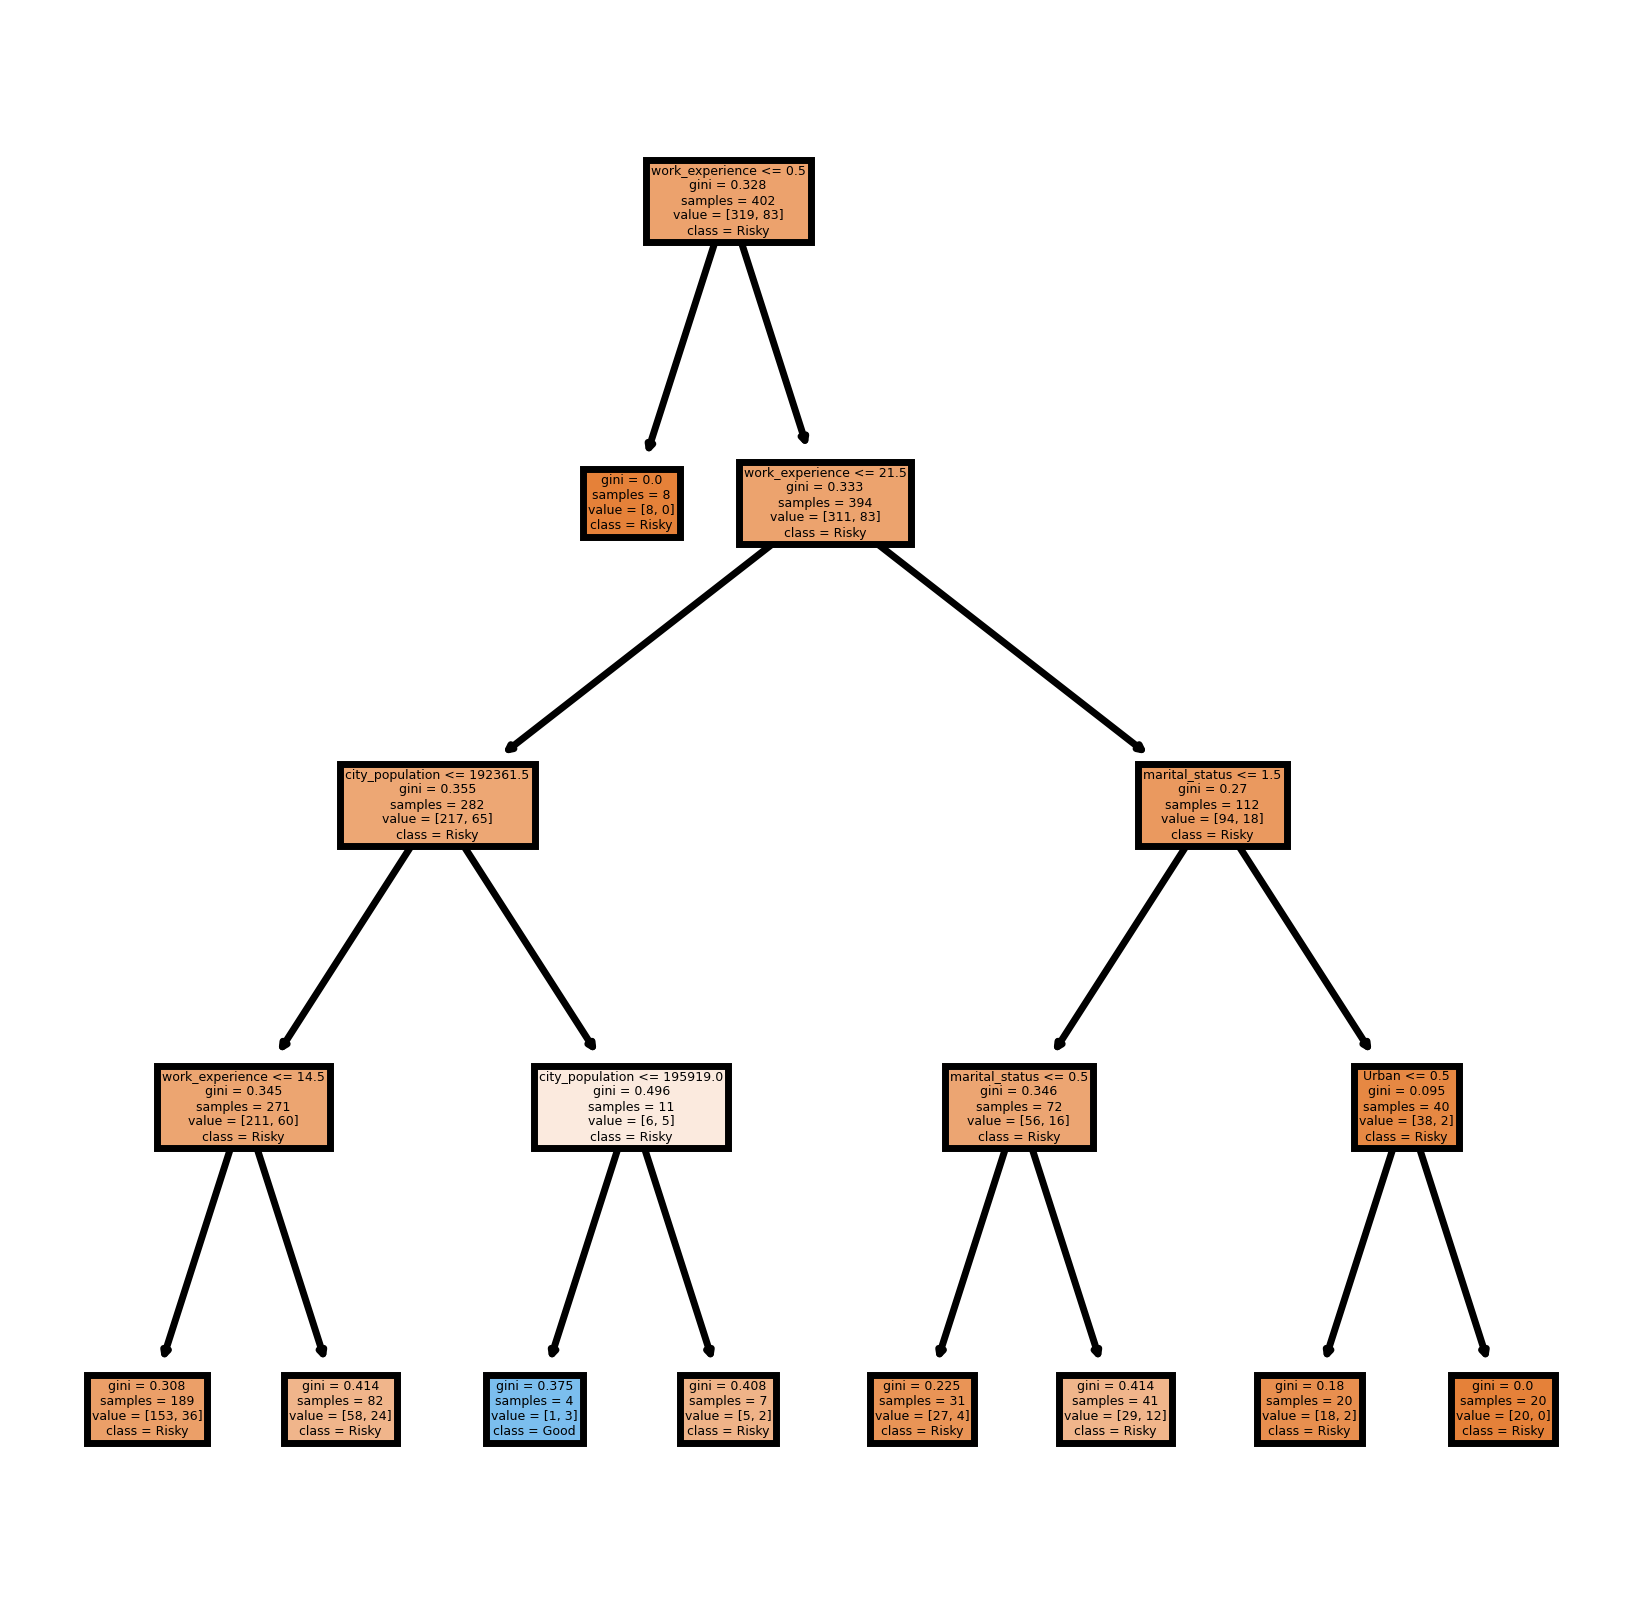

In [106]:
fn=['Undergrad','marital_status','city_population','work_experience','Urban']
cn=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(model_gi1,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [107]:
#predicting on test data
pred_g_strat = model_gi1.predict(x_test_strat)

In [108]:
#Accuracy
print((y_test_strat==pred_g_strat).value_counts())

True     154
False     44
Name: taxable_category, dtype: int64


In [109]:
np.mean(y_test_strat==pred_g_strat)

0.7777777777777778

In [113]:
pd.crosstab(pred_g_strat,y_test_strat)

taxable_category    0   1
row_0                    
0                 154  41
1                   3   0

Result- model_gini predicting 'Risky' precisely.